<a href="https://colab.research.google.com/github/kemaladamr/ML_with_sklearn/blob/main/LinearEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

import pandas as pd

boston = load_boston()

df_dataset = pd.DataFrame(
    boston.data,
    columns=boston.feature_names
)
df_dataset['target'] = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# data exploration

df_dataset.isnull().sum().sum()

0

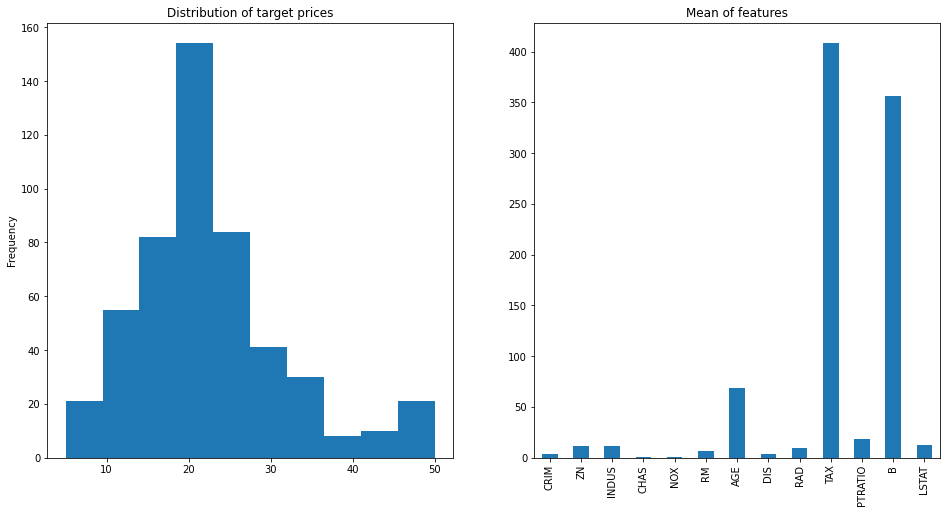

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df_dataset['target'].plot(
    title='Distribution of target prices', kind='hist', ax=axs[0]
)

df_dataset[boston.feature_names].mean().plot(
    title='Mean of features', kind='bar', ax=axs[1]
)

fig.show()

In [7]:
df_dataset['target'].describe(percentiles=[.9, .95, .99])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

In [8]:
# splitting data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dataset, test_size=0.4)

x_train = df_train[boston.feature_names]
x_test = df_test[boston.feature_names]

y_train = df_train['target']
y_test = df_test['target']


In [9]:
# calculating baseline
from sklearn.dummy import DummyRegressor

baselin = DummyRegressor(strategy='mean')
baselin.fit(x_train, y_train)

y_test_baselin = baselin.predict(x_test)

In [10]:
# training linear regressor
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)

In [11]:
# evaluating model's accuracy
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def print_error_scores(y_test,y_test_pred, y_test_baselin):
  
  print(
      'R2 Regressor = {:.2f} vs Baseline = {:.2f}'.format(
          r2_score(y_test, y_test_pred),
          r2_score(y_test, y_test_baselin)
      )
  )

  print(
      'MAE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
          mean_absolute_error(y_test, y_test_pred),
          mean_absolute_error(y_test, y_test_baselin)
      )
  )

  print(
      'MSE Regressor = {:.2f} vs Baseline = {:.2f}'.format(
          mean_squared_error(y_test, y_test_pred),
          mean_squared_error(y_test, y_test_baselin)
      )
  )

print_error_scores(y_test,y_test_pred, y_test_baselin)

R2 Regressor = 0.74 vs Baseline = -0.00
MAE Regressor = 3.62 vs Baseline = 7.34
MSE Regressor = 25.33 vs Baseline = 98.24


In [12]:
# show feature coefficients
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_)
    }
).set_index('Features').sort_values('Coeff', ascending=False)

In [13]:
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.136799,3.136799
CHAS,2.957736,2.957736
RAD,0.288736,0.288736
ZN,0.058528,0.058528
INDUS,0.020290,0.020290
B,0.008857,0.008857
AGE,0.000184,0.000184
TAX,-0.010738,0.010738
CRIM,-0.121155,0.121155


In [14]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
# x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg.fit(x_train_scaled, y_train)
y_test_pred = reg.predict(x_test_scaled)

In [15]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_)
    }
).set_index('Features').sort_values('Coeff', ascending=False)

df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,16.370953,16.370953
RAD,6.640939,6.640939
ZN,5.852793,5.852793
B,3.493071,3.493071
CHAS,2.957736,2.957736
INDUS,0.553515,0.553515
AGE,0.017869,0.017869
TAX,-5.616072,5.616072
PTRATIO,-8.761000,8.761000


In [16]:
# adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [17]:
feature_translator = [
      (f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)
]

def translate_feature_names(s):
  for key, val in feature_translator:
    s = s.replace(key, val)
  return s

poly_features = [
      translate_feature_names(f) for f in poly.get_feature_names()
]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

print_error_scores(y_test,y_test_pred, y_test_baselin)

R2 Regressor = -174.93 vs Baseline = -0.00
MAE Regressor = 46.19 vs Baseline = 7.34
MSE Regressor = 17282.94 vs Baseline = 98.24


In [19]:
# training lassso regressor
from sklearn.linear_model import Ridge, Lasso

reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly, y_train)

y_test_pred = reg.predict(x_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.251e+02, tolerance: 1.769e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [20]:
print_error_scores(y_test,y_test_pred, y_test_baselin)

R2 Regressor = 0.81 vs Baseline = -0.00
MAE Regressor = 2.73 vs Baseline = 7.34
MSE Regressor = 18.81 vs Baseline = 98.24


In [21]:
# finding optimum regularization parameter

from sklearn.linear_model import LassoCV

# make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6, 6, 50)

# we will do 5-fold cross validation
reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5)
reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+02, tolerance: 1.409e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.495e+02, tolerance: 1.409e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [22]:
print(f"LassoCV: Chosen alpha = {reg.alpha_}")

LassoCV: Chosen alpha = 3556.4803062231213


In [23]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]

# calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# std error = std deviation / sqrt (number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

Text(0, 0.5, 'Mean Squared Error')

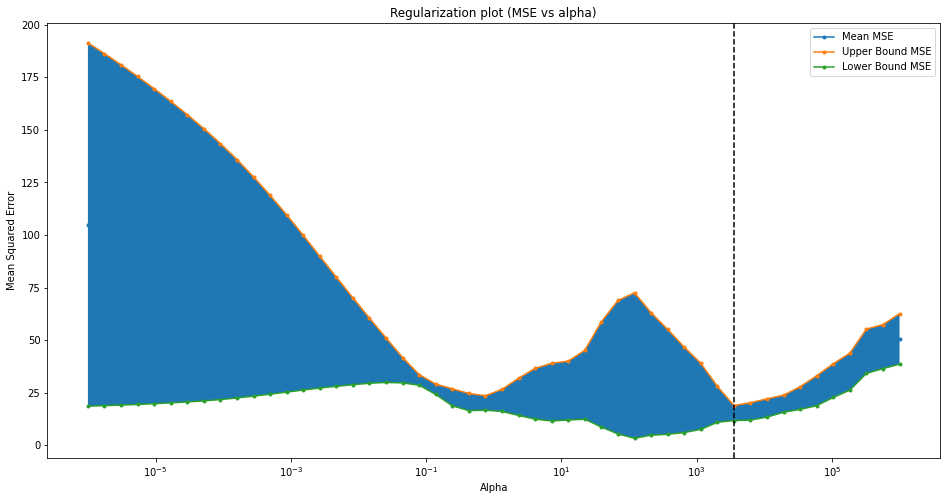

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# multiply by 1.96 for 95% Confidence Interval
pd.DataFrame(
    {
        'alpha': reg.alphas_,
        'Mean MSE': mse_mean,
        'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
        'Lower Bound MSE': mse_mean - 1.96 * mse_std_error
    }
).set_index('alpha')[
  ['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
    title='Regularization plot (MSE vs alpha)',
    marker='.', logx=True, ax=ax
)

# color the confidence interval
plt.fill_between(
    reg.alphas_,
    mse_mean + 1.96 * mse_std_error,
    mse_mean - 1.96 * mse_std_error
)

# print a vertical line for the choosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

In [25]:
# find regression interval

df_noisy = pd.DataFrame(
    {
        'x': np.random.randint(0, 30, size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)

df_noisy['y'] = df_noisy['x'] + df_noisy['noise']

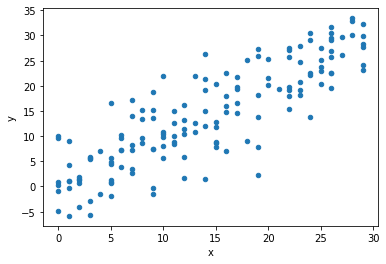

In [26]:
df_noisy.plot(
    kind='scatter', x='x', y='y'
)

In [27]:
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])

br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']], return_std=True)

In [28]:
df_noisy.head()

,x,noise,y,y_lr_pred,y_br_pred,y_br_std
0,12,-10.275090,1.724910,12.073241,12.078141,5.233367
1,22,-2.870910,19.129090,21.818493,21.799056,5.309662
2,23,-2.259963,20.740037,22.793019,22.771147,5.319678
3,7,-3.522426,3.477574,7.200614,7.217683,5.211850
4,12,-0.513311,11.486689,12.073241,12.078141,5.233367


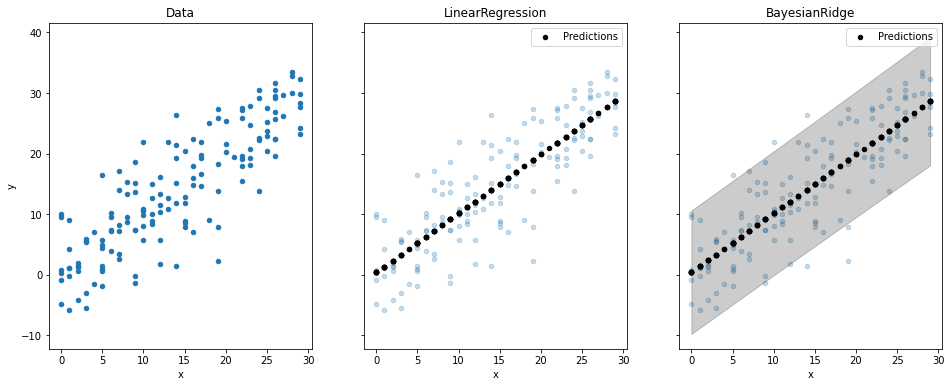

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)

# we plot the data 3 times
df_noisy.sort_values('x').plot(
    title='Data', kind='scatter', x='x', y='y', ax=axs[0]
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[1], marker='o', alpha=0.25
)
df_noisy.sort_values('x').plot(
    kind='scatter', x='x', y='y', ax=axs[2], marker='o', alpha=0.25
)

# here we plot the linear regression predictions
df_noisy.sort_values('x').plot(
    title='LinearRegression', kind='scatter', x='x', y='y_lr_pred',
    ax=axs[1], marker='o', color='k', label='Predictions'
)

# here we plot the bayesian ridge predictions
df_noisy.sort_values('x').plot(
    title='BayesianRidge', kind='scatter', x='x', y='y_br_pred',
    ax=axs[2], marker='o', color='k', label='Predictions'
)

# here we plot the range around the expected values
# we multiply by 1.96 for 95% Confidence Interval
axs[2].fill_between(
    df_noisy.sort_values('x')['x'],
    df_noisy.sort_values('x')['y_br_pred'] - 1.96 *
        df_noisy.sort_values('x')['y_br_std'],
    df_noisy.sort_values('x')['y_br_pred'] + 1.96 *
        df_noisy.sort_values('x')['y_br_std'],
    color='k', alpha=0.2, label='Predictions +/- 1.96 * Std Dev'
)

fig.show()

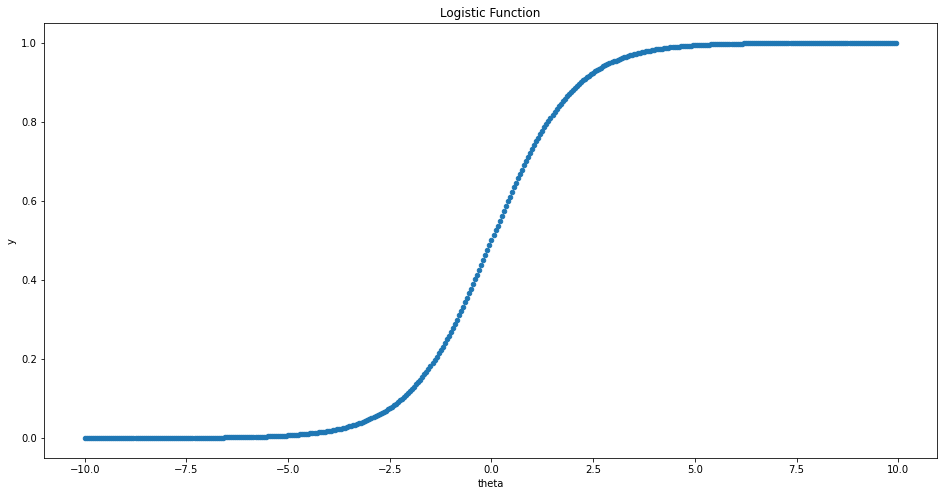

In [30]:
# understanding logistic function

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

theta = np.arange(-10, 10, 0.05)
y = 1/(1+np.exp(-1*theta))

pd.DataFrame(
    {
        'theta': theta,
        'y': y
    }
).plot(
    title='Logistic Function',
    kind='scatter', x='theta', y='y',
    ax=ax
)

fig.show()

In [31]:
# classifying iris dataset using logistic regression
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

num_folds = 6

clf = LogisticRegression(
    solver='lbfgs', multi_class='multinomial', max_iter=1000
)
accuracy_scores = cross_validate(
    clf, df[iris.feature_names], df['target'],
    cv=num_folds, scoring=['accuracy']
)

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror)
    )
)

Logistic Regression: Accuracy (6-fold): 0.94 ~ 0.99


In [33]:
# fit the model again befor getting its coefficients
clf.fit(df[iris.feature_names], df['target'])

# use dictionary comprehension instead of for-loop
df_coef = pd.DataFrame(
    {
        f'Coef [Class {class_id}]': clf.coef_[class_id]
        for class_id in range(clf.coef_.shape[0])
    },
    index=iris.feature_names
)
df_coef.loc['intercept', :] = clf.intercept_

In [34]:
df_coef

,Coef [Class 0],Coef [Class 1],Coef [Class 2]
sepal length (cm),-0.423165,0.534313,-0.111148
sepal width (cm),0.966885,-0.321597,-0.645288
petal length (cm),-2.516694,-0.206663,2.723356
petal width (cm),-1.080784,-0.943552,2.024336
intercept,9.849024,2.238180,-12.087204


In [46]:
# understanding classifier's decision boundaries

def plot_decision_boundary(clf, x, y, ax, title):

  cmap='Paired_r'
  feature_names = x.columns
  x, y = x.values, y.values

  x_min, x_max = x[:,0].min(), x[:,0].max()
  y_min, y_max = x[:,1].min(), x[:,1].max()

  step = 0.02

  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, step),
      np.arange(y_min, y_max, step)
  )
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, Z, colors='k', linewidth=0.7)
  ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
  ax.set_title(title)
  ax.set_xlabel(feature_names[0])
  ax.set_ylabel(feature_names[1])

In [37]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'linewidth'


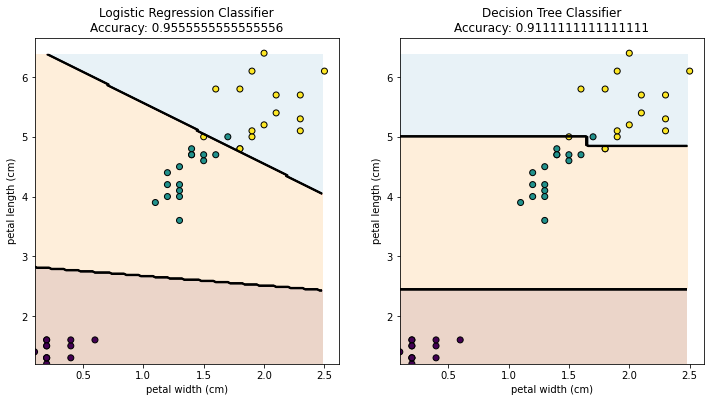

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
two_features = ['petal width (cm)', 'petal length (cm)']

clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'],
    clf_lr.predict(df_test[two_features])
)
plot_decision_boundary(
    clf_lr, df_test[two_features], df_test['target'], ax=axs[0],
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(
    df_test['target'],
    clf_dt.predict(df_test[two_features])
)

plot_decision_boundary(
    clf_dt, df_test[two_features], df_test['target'], ax=axs[1],
    title=f'Decision Tree Classifier\nAccuracy: {accuracy}'
)

fig.show()